# Preço de imoveis

**Objetivo**: estimar os preços de imóveis
 * Identificar aspectos que contribuem para precificação dos imoveis
 * Entender qual aspecto é mais relevante, qual influencia mais no preço do imóvel.
 * Precificar um imóvel novo.

Base de dados simplificada e inspirada em [House Prices](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques)



![](https://i.imgur.com/A8X79yq.jpeg)


# 1. Ajustando uma reta

## Conhecendo os dados

In [3]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
#Lendo dados
dados = pd.read_csv('../../dataset/precos_de_casas.csv')
dados.head()

,Id,area_primeiro_andar,existe_segundo_andar,area_segundo_andar,quantidade_banheiros,capacidade_carros_garagem,qualidade_da_cozinha_Excelente,preco_de_venda
0,1,79.5224,1,79.3366,2,548,0,1027905.0
1,2,117.2398,0,0.0000,2,460,0,894795.0
2,3,85.4680,1,80.4514,2,608,0,1101855.0
3,4,89.2769,1,70.2324,1,642,0,690200.0
4,5,106.3705,1,97.8237,2,836,0,1232500.0


In [5]:
#Quais fatores coletados?
dados.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Id                              1438 non-null   int64  
 1   area_primeiro_andar             1438 non-null   float64
 2   existe_segundo_andar            1438 non-null   int64  
 3   area_segundo_andar              1438 non-null   float64
 4   quantidade_banheiros            1438 non-null   int64  
 5   capacidade_carros_garagem       1438 non-null   int64  
 6   qualidade_da_cozinha_Excelente  1438 non-null   int64  
 7   preco_de_venda                  1438 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 90.0 KB


In [6]:
# Nesse contexto a id é irrelevante, por tanto será excluído
dados = dados.drop(columns = "Id")
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   area_primeiro_andar             1438 non-null   float64
 1   existe_segundo_andar            1438 non-null   int64  
 2   area_segundo_andar              1438 non-null   float64
 3   quantidade_banheiros            1438 non-null   int64  
 4   capacidade_carros_garagem       1438 non-null   int64  
 5   qualidade_da_cozinha_Excelente  1438 non-null   int64  
 6   preco_de_venda                  1438 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 78.8 KB


In [7]:
dados.head()

,area_primeiro_andar,existe_segundo_andar,area_segundo_andar,quantidade_banheiros,capacidade_carros_garagem,qualidade_da_cozinha_Excelente,preco_de_venda
0,79.5224,1,79.3366,2,548,0,1027905.0
1,117.2398,0,0.0000,2,460,0,894795.0
2,85.4680,1,80.4514,2,608,0,1101855.0
3,89.2769,1,70.2324,1,642,0,690200.0
4,106.3705,1,97.8237,2,836,0,1232500.0


## Correlação

Quais fatores estão relacionados ao preço da casa? Como é essa relação?

Com o coeficiente de Correlação de Pearson nos permite medir a relação linear entre variáveis, oferecendo uma escala que varia de -1 a 1, que interpretamos conforme sua intensidade e direção:

* -1: indica uma correlação negativa perfeita: à medida que uma variável aumenta, a outra diminui.
* 0: não há relação linear entre as variáveis.
* 1: correlação positiva perfeita: à medida que uma variável aumenta, a outra também aumenta.



*corr = dados.corr()*

- `dados`: Refere-se ao seu conjunto de dados (DataFrame do pandas).
- `.corr()`: Este é um método do pandas que calcula a matriz de correlação de todas as colunas numéricas do DataFrame `dados`. A matriz de correlação mostra o coeficiente de correlação entre cada par de colunas.
- `corr` = ...: O resultado dessa matriz de correlação é armazenado na variável `corr`.

*corr['preco_de_venda']*

- `corr`: É a matriz de correlação que calculamos no passo anterior.
- `['preco_de_venda']`: Aqui, estamos selecionando uma coluna específica dessa matriz, a coluna que corresponde à correlação do `preco_de_venda` com todas as outras colunas no seu conjunto de dados.
*Resultado*: Isso te dará uma série de valores, onde o índice de cada valor é o nome de uma coluna no seu DataFrame original, e o valor em si é o coeficiente de correlação entre essa coluna e o `preco_de_venda`.

> Em resumo, esse código serve para você ver rapidamente como cada um dos fatores (colunas) no seu conjunto de dados se relaciona com o preço de venda.

In [8]:
# Correlação com a coluna 'preco_de_venda'
corr = dados.corr()
corr['preco_de_venda']

area_primeiro_andar               0.616557
existe_segundo_andar              0.138541
area_segundo_andar                0.305311
quantidade_banheiros              0.563132
capacidade_carros_garagem         0.640214
qualidade_da_cozinha_Excelente    0.496223
preco_de_venda                    1.000000
Name: preco_de_venda, dtype: float64

In [9]:
# Atividade
# Quais fatores estão mais correlacionados?




## Vamos praticar o conceito de correlação?

A correlação entre cada característica da casa com seu preço; no entanto, o coeficiente de correlação também pode ser aplicado para qualquer dupla de variáveis.

Nesta atividade, analise a correlação de todas as variáveis através de uma forma visual, executando o código abaixo em uma célula do seu notebook.

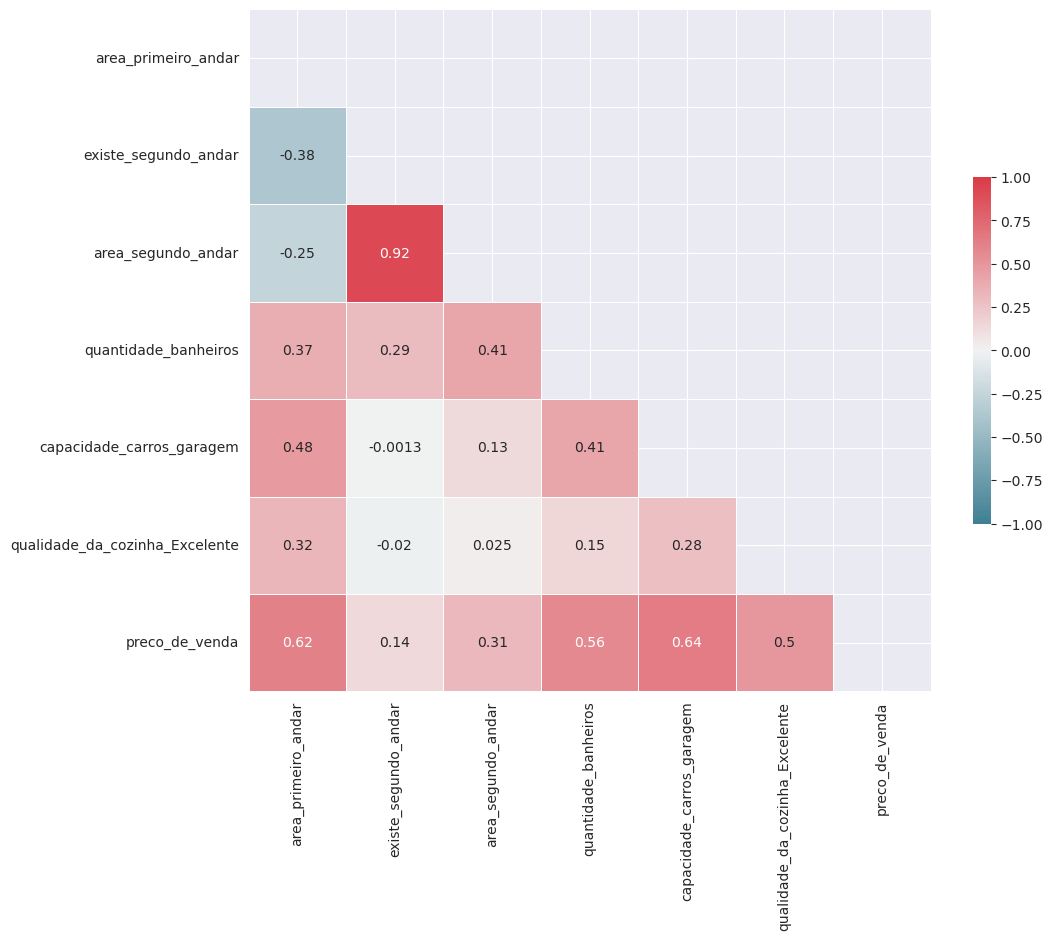

In [10]:
# Atividade
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Lendo dados
dados = pd.read_csv("../../dataset/precos_de_casas.csv")
dados = dados.drop(columns = "Id")

# Correlação
corr = dados.corr()

# Quais fatores estão mais correlacionados?

# Gerar uma máscara para o triângulo superior
mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar a figura do matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Gerar o mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# Exibir o mapa de calor (heatmap)
plt.show()


Dica: Atente-se nos pontos abaixo para uma análise completa:

    Intensidade: refere-se à força da relação entre as variáveis medidas. Pode variar de -1 a +1, onde -1 indica uma correlação perfeitamente negativa, +1 indica uma correlação perfeitamente positiva e 0 indica ausência de correlação linear.
    Direção: refere-se à natureza da relação entre as variáveis medidas. Uma correlação positiva indica que as variáveis aumentam ou diminuem juntas, enquanto uma correlação negativa indica que uma variável aumenta enquanto a outra diminui, ou vice-versa.

Exemplo:

O coeficiente de correlação linear entre a área do primeiro andar e o preço de venda é de 0.62, indicando uma correlação positiva moderadamente forte (intensidade). Em geral, à medida que a área do primeiro andar de uma casa aumenta, o preço de venda também tende a aumentar (direção).

Elencamos alguns coeficientes para analisar:

    A correlação entre a capacidade de carros na garagem e a área do primeiro andar é 0.48 moderadamente positiva, indicando que, em geral, à medida que a capacidade de carros na garagem aumenta, a área do primeiro andar da casa tende a aumentar também.
    Entre garagem para carros e quantidade de banheiros é moderadamente positiva (0.409281), indicando que, em geral, à medida que a capacidade da garagem aumenta, o número de banheiros também tende a aumentar. Isso sugere uma possível associação entre o espaço para estacionamento de veículos e o tamanho da residência.
    Quando olhamos para a correlação entre a área do primeiro andar e a área do segundo andar, verificamos que é fraca e negativa (-0.25). Isso sugere que, em geral, quando a área do primeiro andar de uma casa aumenta, a área do segundo andar tende a diminuir um pouco, e vice-versa. Essa relação indica uma possível compensação entre as áreas dos dois andares, mas não é uma relação muito forte e pode variar entre diferentes propriedades.

Observação: É importante notar que a correlação não implica causalidade; ou seja, não podemos afirmar que o aumento no preço de venda é causado especificamente pelo aumento na área do primeiro andar apenas com o uso da correlação, mas sim que esses fatores estão relacionados entre si.


### Aprendi até aqui:
    Obter o coeficiente de correlação dos dados;
    Analisar a intensidade e a direção da correlação entre duas variáveis;
    Identificar linearidade no gráfico de dispersão;
    Diferenciar variável explicativa de variável resposta;
    Visualizar a melhor reta utilizando o Plotly.

## Relacionando variáveis

In [11]:
# importando as visualizações
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



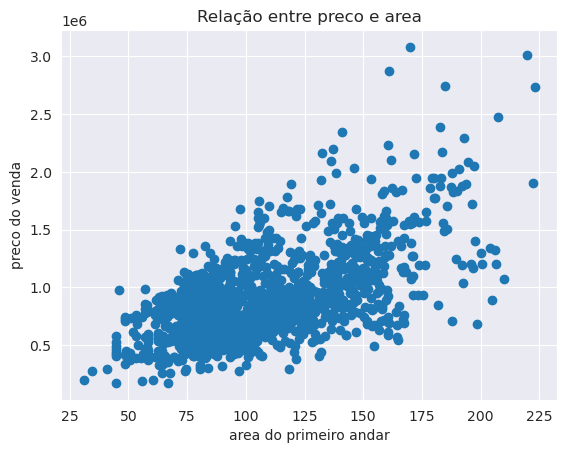

In [12]:
# Como é a relação entre área construida e o preço do imóvel?
plt.scatter(dados['area_primeiro_andar'],dados['preco_de_venda'])
plt.title('Relação entre preco e area')
plt.xlabel('area do primeiro andar')
plt.ylabel('preco do venda')
plt.show()


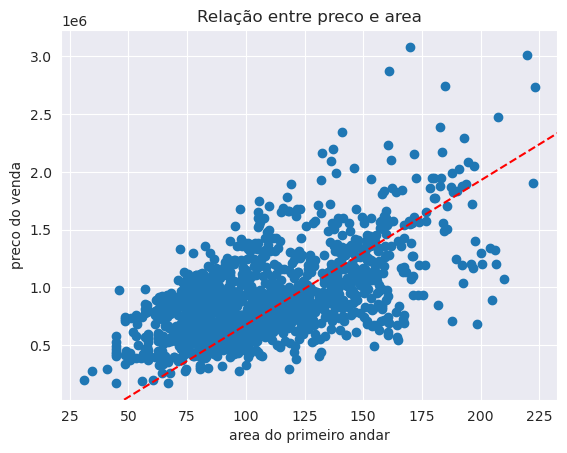

In [13]:
# Aparentemente quanto maior a área do primeiro andar, maior o preço da casa.
# E se quisermos traçar uma linha que melhor representa esse comportamento?

plt.scatter(dados['area_primeiro_andar'],dados['preco_de_venda'])
plt.axline(xy1= (66, 250000), xy2=(190, 1800000), color='red', linestyle='--')
plt.title('Relação entre preco e area')
plt.xlabel('area do primeiro andar')
plt.ylabel('preco do venda')
plt.show()




## Melhor reta

In [14]:
# Qual a reta que melhor se adequa a relação? utiliza-se a biblioteca plotly
px.scatter(dados, x='area_primeiro_andar',y='preco_de_venda', trendline_color_override="red", trendline='ols')



# 2. Explicando a reta
Ajustamos uma reta entre o $m^2$ do primeiro andar e o preço da casa. Queremos explicar o preço da casa a partir do seu tamanho, por isso dizemos que:

* Variável explicativa/independente: Área do primeiro andar

* Variável resposta/dependente: Preço da casa

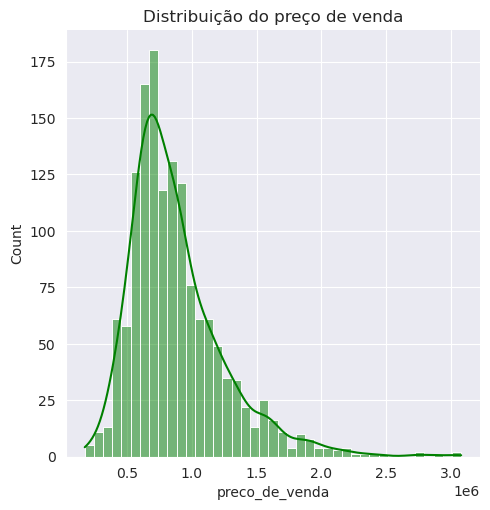

In [15]:
#Quem é nossa variável resposta?

sns.displot(dados['preco_de_venda'], kde=True, color='green')
plt.title('Distribuição do preço de venda')
plt.show()

### Separando em treino e teste

O conjunto de **treinamento** é usado para ajustar o modelo, enquanto o conjunto de **teste** é usado para avaliar seu desempenho em prever preços de casas não vistos durante o treinamento, que auxilia na generalização do modelo.

> Dividir o conjunto de dados em conjuntos de treino e teste é uma prática essencial em machine learning para avaliar a capacidade de generalização do modelo. O conjunto de treino é usado para treinar o modelo, enquanto o conjunto de teste é mantido separado e usado para avaliar o desempenho do modelo em dados não vistos, simulando como o modelo se comportaria ao ser aplicado em situações reais.

In [16]:
# import train_test_split
from sklearn.model_selection import train_test_split


In [17]:
# Definindo y e X
y = dados['preco_de_venda']
x = dados.drop(columns='preco_de_venda') # X representa todoas as colunas que não seja preco_de_vendas


In [18]:
#Aplicando o split do y e X
# Retorna 4 conjuntos e tem como parametros test_size que recebe a porcentagem para o tamanho do teste e randon_state que recebe o valor da semente para a escolha aleatória dos itens dos conjuntos de teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=230)



como se encaixa no contexto do treinamento do modelo de regressão linear.

**Objetivo:**

O objetivo desse trecho de código é criar um DataFrame chamado `df_train` que será usado para treinar o modelo de regressão linear. Esse DataFrame combinará as variáveis independentes (características) do conjunto de treinamento (`X_train`) com a variável dependente (`preço de venda`) do conjunto de treinamento (`Y_train`).

Linha 1: `df_train = pd.DataFrame(data=X_train)`

- `pd.DataFrame()`: Esta é a função construtora do Pandas para criar um DataFrame. Um DataFrame é uma estrutura de dados tabular, semelhante a uma planilha, com linhas e colunas.
-
- `data=X_train`: Aqui, estamos fornecendo os dados para o DataFrame. `X_train` é um conjunto de dados que contém as variáveis independentes (características) que serão usadas para prever o preço de venda. Ao passar X_train para o argumento data, estamos criando as colunas do DataFrame com base nas colunas de `X_train`.

Em resumo: Esta linha cria um novo DataFrame chamado `df_train` e o preenche com os dados das variáveis independentes do conjunto de treinamento `X_train`.

Linha 2: `df_train['preco_de_venda'] = Y_train`

- `df_train['preco_de_venda']`: Aqui, estamos adicionando uma nova coluna ao DataFrame `df_train`. O nome desta coluna será `'preco_de_venda'`.
- `Y_train`: Este é o conjunto de dados que contém os valores da variável dependente (`preço de venda`) correspondentes aos dados em `X_train`.

Em resumo: Esta linha adiciona uma nova coluna chamada `'preco_de_venda'` ao DataFrame `df_train` e preenche essa coluna com os valores dos preços de venda do conjunto de treinamento `Y_train`.

In [19]:
#Dados de treino para usar a fórmula - base de treino
df_train = pd.DataFrame(data=x_train)
df_train['preco_de_venda'] = y_train # insere uma coluna 'preco_de_venda' com os dados de ytrain


In [20]:
# import ols
from statsmodels.formula.api import ols



Objetivo:

O objetivo desse trecho de código é criar e ajustar um modelo de regressão linear simples usando a biblioteca statsmodels. Este modelo irá estimar a relação entre o preço de venda de um imóvel (preco_de_venda) e a área do primeiro andar (area_primeiro_andar).

Linha 1: `modelo_0 = ols('preco_de_venda ~ area_primeiro_andar', data=df_train).fit()`

- `ols()`: Esta é a função da biblioteca `statsmodels` que cria um modelo de *Ordinary Least Squares* (OLS), que é um tipo de modelo de **regressão linear**.
- `'preco_de_venda ~ area_primeiro_andar'`: Esta é uma fórmula que especifica a relação entre as variáveis no modelo.
- `preco_de_venda`: É a variável dependente, ou seja, a variável que estamos **tentando prever**.
- `~`: Este símbolo indica que a variável à esquerda (`preco_de_venda`) é modelada em função da(s) variável(is) à direita.
- `area_primeiro_andar`: É a variável independente, ou seja, a variável que estamos usando para prever o preço de venda.
- `data=df_train`: Aqui, estamos especificando que os dados a serem usados para ajustar o modelo estão contidos no DataFrame `df_train`. Este DataFrame deve conter as colunas `'preco_de_venda'` e `'area_primeiro_andar'`.
- `.fit()`: Este método ajusta o modelo aos dados. Em outras palavras, ele encontra os melhores valores para os coeficientes da regressão linear que minimizam a soma dos quadrados dos erros entre os valores previstos e os valores reais de `'preco_de_venda'`.
- `modelo_0 =`: Aqui, estamos atribuindo o modelo ajustado à variável modelo_0. Esta variável agora contém o modelo de regressão linear que pode ser usado para fazer previsões.

Em resumo: Esta linha de código cria um modelo de regressão linear que tenta prever o preço de venda de um imóvel com base na área do primeiro andar, usando os dados contidos no DataFrame df_train. O modelo é então ajustado aos dados e armazenado na variável modelo_0.

Exemplo:

Suponha que df_train contenha dados sobre o preço de venda e a área do primeiro andar de várias casas. Após a execução desta linha de código, modelo_0 conterá um modelo que pode ser usado para prever o preço de venda de uma nova casa com base em sua área do primeiro andar.

Analogia:

Imagine que você está tentando descobrir como o preço de um carro depende de sua idade. Você coleta dados sobre a idade e o preço de vários carros e usa esses dados para criar um modelo. O código que você mencionou é como criar esse modelo usando a biblioteca statsmodels. A fórmula 'preco_de_venda ~ area_primeiro_andar' é como dizer ao modelo que você acredita que o preço do carro depende de sua idade. O método .fit() é como ajustar o modelo aos dados para que ele possa fazer previsões precisas.

Dica:

Lembre-se de que este é um modelo de regressão linear simples, o que significa que ele assume que a relação entre o preço de venda e a área do primeiro andar é linear. Em outras palavras, ele assume que o preço de venda aumenta ou diminui a uma taxa constante à medida que a área do primeiro andar aumenta. Em muitos casos, essa pode ser uma simplificação excessiva da realidade, mas pode ser um bom ponto de partida para a análise.

In [21]:
# ajustando o primeiro modelo
modelo_0 = ols('preco_de_venda ~ area_primeiro_andar', data=df_train).fit()


## Analisando os coeficientes

(intensidade, direção e significância)

O código `modelo_0.params` é utilizado para acessar os parâmetros (coeficientes) do modelo de regressão linear que foi treinado. No caso, `modelo_0` é o nome dado ao modelo que já foi treinado anteriormente.


In [22]:
# visualizando os parametros
modelo_0.params


Intercept              152909.288334
area_primeiro_andar      6793.641641
dtype: float64

**Interpretando os resultados**

*Intercepto (B₀):*

- O `intercepto` representa o valor esperado da variável dependente (`preço da casa`) quando a variável independente (`área do primeiro andar`) é **zero**.
        Neste caso, o `intercepto` é R$ 152.909,29. Isso significa que, em média, espera-se que uma casa sem área construída no primeiro andar tenha um preço de venda de aproximadamente R$ 152.909,29.
> É importante lembrar que essa interpretação pode não fazer sentido prático, já que uma casa sem área construída no primeiro andar é uma situação hipotética. No entanto, o intercepto é fundamental para posicionar a linha de regressão no gráfico.

*Coeficiente da área do primeiro andar (B₁)*:
- O `coeficiente da área do primeiro andar` representa a variação esperada no preço da casa para cada unidade de aumento na área do primeiro andar.
        Neste caso, o `coeficiente` é 6793.641641. Isso significa que, em média, para cada metro quadrado adicional na área do primeiro andar, espera-se que o preço da casa aumente em R$ 6.793,64.
> O sinal positivo do coeficiente indica que há uma relação linear positiva entre a área do primeiro andar e o preço da casa. Ou seja, quanto maior a área do primeiro andar, maior o preço da casa.

Em resumo, esses parâmetros nos dão informações importantes sobre como a área do primeiro andar influencia o preço das casas no seu conjunto de dados.

In [23]:
# o resumo do nosso modelo
print(modelo_0.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     608.3
Date:                Sat, 02 Aug 2025   Prob (F-statistic):          2.22e-105
Time:                        17:55:51   Log-Likelihood:                -14082.
No. Observations:                1006   AIC:                         2.817e+04
Df Residuals:                    1004   BIC:                         2.818e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.529e+05   3

* O **intercepto** é o valor esperado do preço da casa quando todas as outras variáveis são zero. Neste caso, quando todas as outras variáveis a área do primeiro andar é zero, o preço esperado da casa é de R$ 145.196,40. Nem sempre temos uma interpretação prática desse número.

* O **efeito individual** da área é 6833.97. Isso indica que para cada 1m² adicinado à área do primero andar espera-se que o preço da casa aumente em média R$6.833,97.

<img src="assets/7Cm4Cot.png" width="500"/>


### Função

<img src="assets/imgEquacao.png" width="500"/>

    Variável Resposta (Y): Também chamada de variável dependente é aquela que estamos tentando prever.
    Intercepto (β₀): O ponto onde a linha de regressão intercepta o eixo vertical (Y), ou seja, o valor de Y quando X é igual a 0.
    Variável Explicativa (X): Também chamada de variável independente e é o fator que usamos para prever e explicar a variável resposta.
    Coeficientes de Regressão (β₁): Impacto de cada variável explicativa X na variável resposta, é o efeito de X em Y.
    Erro Residual (e): Diferença entre os valores reais e previstos da variável resposta.

## Explicabilidade do modelo

Quanto a variação da área está explicando os diversos preços das casas?

Nesse caso recorremos a métrica R², o coeficiente de determinação. O R² varia de 0 a 1, onde 1 indica um ajuste perfeito do modelo aos dados, ou seja, todas as variações na variável dependente são explicadas pelas variáveis independentes no modelo. Por outro lado, um R² de 0 indica que o modelo não explica nenhuma variabilidade na variável dependente

In [24]:
# observando o R²
modelo_0.rsquared

np.float64(0.3772801099429789)

O coeficiente de determinação, frequentemente chamado de R², é uma medida estatística que indica o quanto a variabilidade da variável dependente (resposta) é explicada pelo modelo de regressão linear.
#### Interpretando o R²

Ele varia de 0 a 1, um valor próximo de 1 indica que o modelo ajusta bem os dados, explicando a maioria da variação na variável dependente/resposta. Já um valor próximo de 0 indica que o modelo não consegue explicar muita variação na variável dependente/resposta.
#### Usando no teste

Além disso, o R² pode ser usado para comparar o desempenho do modelo em diferentes conjuntos de dados, como treinamento e teste. Isso ajuda a identificar problemas de overfitting (ajuste excessivo) ou underfitting (ajuste insuficiente). Idealmente, desejamos que o R² seja consistente entre os conjuntos de treinamento e teste, indicando uma boa capacidade de generalização do modelo para novos dados.
#### Fórmula

Uma das fórmulas do R² pode ser representada pela razão entre a variação explicada e pela variação total. Por isso que dizemos que quanto mais perto do 1 melhor é adequação do modelo, já que a variação explicada será mais próxima da variação total nessa razão.

O coeficiente $( R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2} )$ mede o ajuste do modelo.

Significado dos termos:

  - $y_i$: valor observado

  - $\hat{y}_i$: valor predito pelo modelo

  - $\bar{y}$: média dos valores observados

  - $n$: número de observações




## Entendendo o resíduo

In [25]:
# Quem são os residuos
modelo_0.resid

1303   -193023.838744
326    -144522.356193
386     399612.747641
615     -68449.596607
236     166010.592859
            ...      
777     465872.680999
271    -497642.319788
723     461150.204718
560    -540482.733402
768     -37547.820756
Length: 1006, dtype: float64

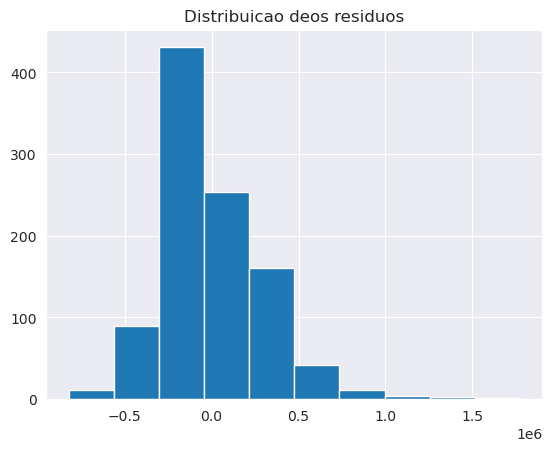

In [26]:
# Como eles estão distribuidos
modelo_0.resid.hist()
plt.title("Distribuicao deos residuos")
plt.show()

![](assets/CJMdXpf.png)

## Obtendo o R² da previsão

In [27]:
# definindo o Y previsto
y_predict=modelo_0.predict(x_test)

In [28]:
# importando o r2_score
from sklearn.metrics import r2_score

In [29]:
# printando o r²
print("R2: ", r2_score(y_test, y_predict))

R2:  0.3853092872320242


Nesta atividade, aplique a função displot da biblioteca Seaborn (sns) e explore os aspectos da visualização de dados. Para isso, utilize seus conhecimentos adquiridos até o momento e desenvolva suas habilidades ainda mais.

Esta função é usada para criar um gráfico de distribuição. O parâmetro kde=True indica que queremos traçar a densidade de kernel estimada sobre o histograma. Através deste exercício prático, você terá a possibilidade de visualizar a forma da distribuição com mais suavidade.

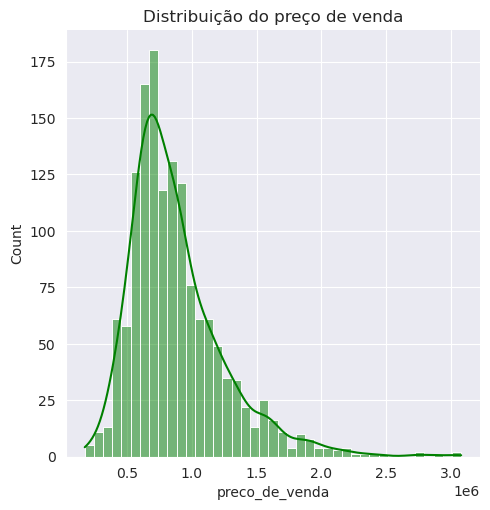

In [30]:
sns.displot(dados['preco_de_venda'], kde=True, color='green')
plt.title('Distribuição do preço de venda')
plt.show()


## Aprendi ate aqui:

    Dividir a base de dados para treinar e testar o modelo;
    Interpretar os coeficientes de regressão linear simples;
    Calcular e interpretar o coeficiente de determinação R²;
    Analisar o quanto cada ponto de dados desvia da linha de regressão ajustada através dos resíduos;
    Compreender quão bem os valores observados se ajustam ao modelo de regressão com R²;
    Calcular o R² no conjunto teste.

# 3. Adicionando outras características

O modelo com apenas um fator nos mostrou um R² de 0.37, ou seja, aproximadamente 37% da variação observada nos preços das casas pode ser explicada pela variação na área.
Isso indica que ainda há uma quantidade significativa de variação que não está sendo capturada por esse modelo específico.Vamos analisar outros fatores para explicar o preço das casas.

## Analisando os fatores

#### O que é:
O `pairplot` para visualizar as relações entre essas variáveis e o preço. Cria uma matriz de gráficos onde cada variável no seu conjunto de dados é comparada com todas as outras. Na diagonal principal, você geralmente vê um histograma que mostra a distribuição de cada variável individualmente. Fora da diagonal, você encontra gráficos de dispersão que mostram a relação entre cada par de variáveis.

#### Quando usar:

    Exploração inicial de dados: Quando você recebe um novo conjunto de dados, o pairplot pode te dar uma visão geral rápida das relações entre as variáveis.
    Identificação de padrões: Ele ajuda a identificar padrões como correlações lineares, não lineares, clusters e outliers.
    Seleção de variáveis para modelos: Ao entender como as variáveis se relacionam com a variável resposta (o preço de venda, no nosso caso), você pode selecionar as variáveis mais relevantes para incluir no seu modelo de regressão.

#### Exemplo prático:
Imagine que você está analisando dados de vendas de casas. Você pode usar o pairplot para visualizar como o preço de venda se relaciona com outras variáveis como área do imóvel, número de quartos e número de banheiros. Isso pode te ajudar a identificar quais variáveis têm maior impacto no preço e, portanto, devem ser incluídas no seu modelo.

#### Analogia:
Pense no pairplot como um "detetive" que te ajuda a descobrir pistas sobre o seu conjunto de dados. Cada gráfico é uma pista que te leva a entender melhor as relações entre as variáveis e a tomar decisões mais informadas sobre quais variáveis usar no seu modelo.

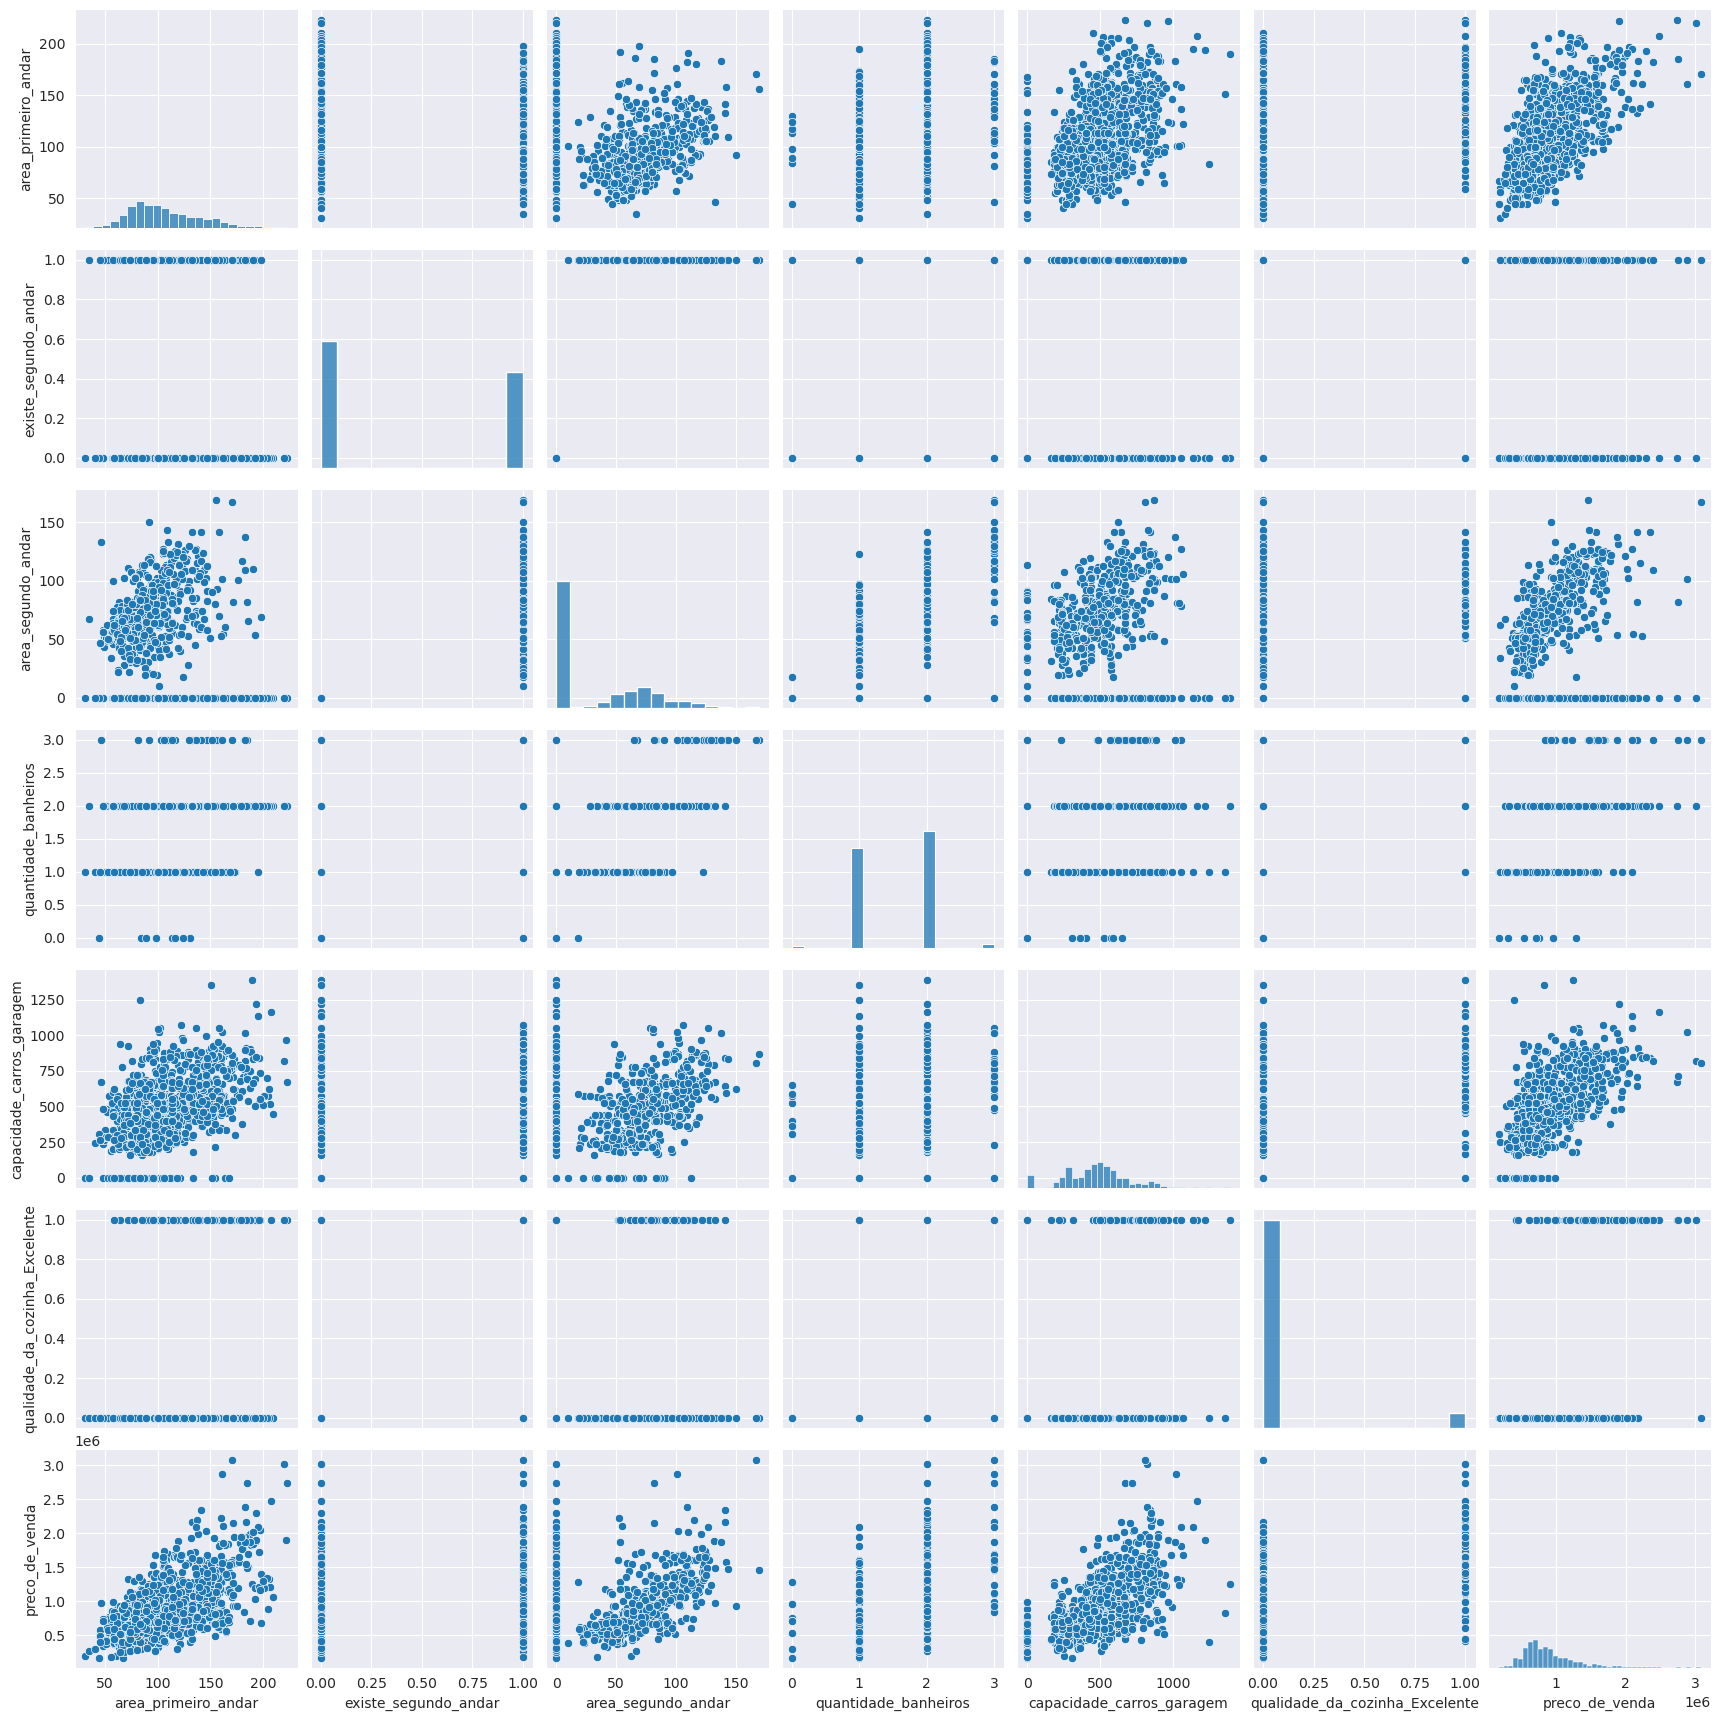

In [31]:
# quais outras características poderiam explicar o preço dos imóveis?
sns.pairplot(dados)

In [32]:
dados.columns

Index(['area_primeiro_andar', 'existe_segundo_andar', 'area_segundo_andar',
       'quantidade_banheiros', 'capacidade_carros_garagem',
       'qualidade_da_cozinha_Excelente', 'preco_de_venda'],
      dtype='object')

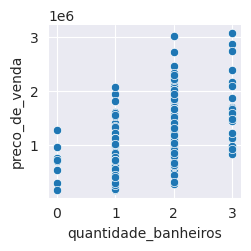

In [33]:
#Vamos olhar apenas com y_vars='preco_de_venda'
# Filtrar apenas para 'preco_de_vendas' (eixo y) pelo preco
sns.pairplot(dados, y_vars=['preco_de_venda'], x_vars='quantidade_banheiros')

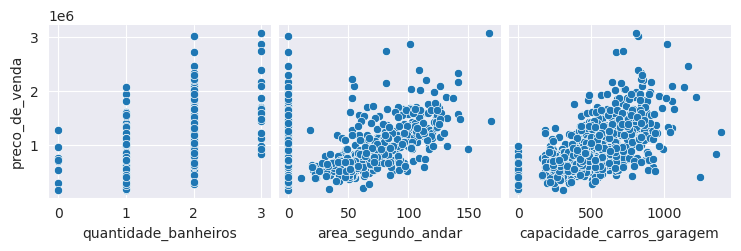

In [34]:
# Fazendo uma analise exploratoria quais outras variaveis podem influenciar no preco
sns.pairplot(dados, y_vars=['preco_de_venda'], x_vars=['quantidade_banheiros', 'area_segundo_andar', 'capacidade_carros_garagem'])

## Adicionando fatores no modelo

In [35]:
# importando a api do statsmodels
import statsmodels.api as sm

In [36]:
# adicionando o constante
X_train = sm.add_constant(x_train)
X_train.head()

,const,area_primeiro_andar,existe_segundo_andar,area_segundo_andar,quantidade_banheiros,capacidade_carros_garagem,qualidade_da_cozinha_Excelente
1303,1.0,65.7732,0,0.0000,1,0,0
326,1.0,55.3684,1,55.3684,1,189,0
386,1.0,74.6916,1,107.4853,2,560,0
615,1.0,103.6764,0,0.0000,1,440,0
236,1.0,94.2006,1,67.8170,2,457,0


In [37]:
X_train.columns

Index(['const', 'area_primeiro_andar', 'existe_segundo_andar',
       'area_segundo_andar', 'quantidade_banheiros',
       'capacidade_carros_garagem', 'qualidade_da_cozinha_Excelente'],
      dtype='object')

In [38]:
# Criando o modelo de regressão (sem fómula): saturado. Com a maioria das variaveis que podem explicar o preco da casa
modelo_1 = sm.OLS(y_train,
                  X_train[['const', 'area_primeiro_andar', 'existe_segundo_andar', 'quantidade_banheiros',
                            'capacidade_carros_garagem', 'qualidade_da_cozinha_Excelente']]).fit()

In [39]:
# Modelo sem a área do segundo andar
modelo_2 = sm.OLS(y_train,
                  X_train[['const', 'area_primeiro_andar', 'existe_segundo_andar',
                            'area_segundo_andar', 'quantidade_banheiros',
                            'capacidade_carros_garagem', 'qualidade_da_cozinha_Excelente']]).fit()

In [40]:
# Modelo sem informações sobre garagem
modelo_3 = sm.OLS(y_train,
                  X_train[['const', 'area_primeiro_andar', 'existe_segundo_andar', 'quantidade_banheiros', 'qualidade_da_cozinha_Excelente']]).fit()

In [41]:
# Resumo do modelo 1
print(modelo_1.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     485.3
Date:                Sat, 02 Aug 2025   Prob (F-statistic):          1.93e-264
Time:                        17:55:57   Log-Likelihood:                -13701.
No. Observations:                1006   AIC:                         2.741e+04
Df Residuals:                    1000   BIC:                         2.744e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [42]:
# Resumo do modelo 2
print(modelo_2.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     477.4
Date:                Sat, 02 Aug 2025   Prob (F-statistic):          2.79e-289
Time:                        17:55:57   Log-Likelihood:                -13640.
No. Observations:                1006   AIC:                         2.729e+04
Df Residuals:                     999   BIC:                         2.733e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [43]:
# Resumo do modelo 3
print(modelo_3.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     467.1
Date:                Sat, 02 Aug 2025   Prob (F-statistic):          4.15e-227
Time:                        17:55:57   Log-Likelihood:                -13790.
No. Observations:                1006   AIC:                         2.759e+04
Df Residuals:                    1001   BIC:                         2.762e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

> Observar as notas de rodape do metodo summary()

## Comparando modelos
Qual o melhor modelo?


In [44]:
print("R²")
print("Modelo 0: ", modelo_0.rsquared)
print("Modelo 1: ", modelo_0.rsquared)
print("Modelo 2: ", modelo_0.rsquared)
print("Modelo 3: ", modelo_0.rsquared)

R²
Modelo 0:  0.3772801099429789
Modelo 1:  0.3772801099429789
Modelo 2:  0.3772801099429789
Modelo 3:  0.3772801099429789


In [45]:
#Quantos parametros estão no modelo?
print("Paramentros Modelo 0: ", len(modelo_0.params))
print("Paramentros Modelo 1: ", len(modelo_1.params))
print("Paramentros Modelo 2: ", len(modelo_2.params))
print("Paramentros Modelo 3: ", len(modelo_3.params))



Paramentros Modelo 0:  2
Paramentros Modelo 1:  6
Paramentros Modelo 2:  7
Paramentros Modelo 3:  5


# 4. Precificando as casas

## Obtendo o R² da previsão

> Utilizar as base de dados de teste, que não foi utilizada no treino

In [46]:
x_test.columns

Index(['area_primeiro_andar', 'existe_segundo_andar', 'area_segundo_andar',
       'quantidade_banheiros', 'capacidade_carros_garagem',
       'qualidade_da_cozinha_Excelente'],
      dtype='object')

In [47]:
modelo_3.params

const                            -129979.678094
area_primeiro_andar                 6119.653184
existe_segundo_andar              221306.959705
quantidade_banheiros              149036.289458
qualidade_da_cozinha_Excelente    444391.228573
dtype: float64

In [48]:
# Adicionando uma constante em X_test
X_test = sm.add_constant(x_test)
X_test.columns

Index(['const', 'area_primeiro_andar', 'existe_segundo_andar',
       'area_segundo_andar', 'quantidade_banheiros',
       'capacidade_carros_garagem', 'qualidade_da_cozinha_Excelente'],
      dtype='object')

In [49]:
# Prevendo com o modelo 3. Atraves do metodo predict() no x_test e com a tupla de colunas
predict03 = modelo_3.predict(X_test[['const', 'area_primeiro_andar', 'existe_segundo_andar','quantidade_banheiros','qualidade_da_cozinha_Excelente']])

In [50]:
# Qual o r² da previsão?
modelo_3.rsquared


np.float64(0.6511289354898804)

In [51]:
# Qual o R² do treino? exemplo com o r2 do scikitlearn
print("R2 : ", r2_score(y_test, predict03))


R2 :  0.6432078074497708


## Precificando uma casa
Aplicando o modelo para prever o preco de um imovel

<img src="https://i.imgur.com/e4gytI1.png" width="800"/>

In [52]:
modelo_3.params

const                            -129979.678094
area_primeiro_andar                 6119.653184
existe_segundo_andar              221306.959705
quantidade_banheiros              149036.289458
qualidade_da_cozinha_Excelente    444391.228573
dtype: float64

In [53]:
#Novo imovel. Gerar um dataframe com as informacoes do novo imovel

novo_imovel = pd.DataFrame({'const':[1], 'area_primeiro_andar':[120], 'existe_segundo_andar':[1], 'quantidade_banheiros':[2], 'qualidade_da_cozinha_Excelente': [0]})





In [54]:
# Qual o preço desse imóvel com o modelo 0?
modelo_0.predict(novo_imovel['area_primeiro_andar']) #  o modelo 0 precisa apenas de uma variavel


0    968146.285305
dtype: float64

In [55]:
# Qual o preço desse imóvel com o modelo 3?
modelo_3.predict(novo_imovel)


0    1.123758e+06
dtype: float64

## Precificando várias casas
Apos o modelo treinado e testado, podemos usa-lo para uma lista de casas.

<img src="https://i.imgur.com/i0skFlB.jpeg" width="600"/>

In [56]:
# Lendo várias casas?
novas_casas = pd.read_csv('../../dataset/Novas_casas_a_precificar.csv', sep =';')
novas_casas.head()


,Casa,area_primeiro_andar,existe_segundo_andar,quantidade_banheiros,qualidade_da_cozinha_Excelente
0,1,150,1,2,1
1,2,180,0,3,1
2,3,120,1,2,1
3,4,200,1,3,1
4,5,160,0,2,1


In [57]:
# excluindo o id
novas_casas = novas_casas.drop(columns= "Casa")
novas_casas.head()



,area_primeiro_andar,existe_segundo_andar,quantidade_banheiros,qualidade_da_cozinha_Excelente
0,150,1,2,1
1,180,0,3,1
2,120,1,2,1
3,200,1,3,1
4,160,0,2,1


In [58]:
# Adicionando uma constante
novas_casas = sm.add_constant(novas_casas)
novas_casas.head()


,const,area_primeiro_andar,existe_segundo_andar,quantidade_banheiros,qualidade_da_cozinha_Excelente
0,1.0,150,1,2,1
1,1.0,180,0,3,1
2,1.0,120,1,2,1
3,1.0,200,1,3,1
4,1.0,160,0,2,1


In [59]:
# Qual o preço dessas novas casas? após preparar o dataframe, pode-se aplicar o modelo
modelo_3.predict(novas_casas)


0    1.751739e+06
1    1.863058e+06
2    1.568149e+06
3    2.206758e+06
4    1.591629e+06
5    1.246151e+06
6    1.357470e+06
7    1.552134e+06
8    9.636478e+05
9    1.639974e+06
dtype: float64

### Exemplo:
Você recebeu uma demanda para estimar o preço de uma casa com as seguintes características:

    1 banheiro
    Área 98m²
    Não contém segundo andar
    Qualidade da cozinha excelente

In [60]:
# gerar o dataframe
novo_imovel = pd.DataFrame({'const':[1],
                            'area_primeiro_andar':[98],
                            'existe_segundo_andar': [0],
                            'quantidade_banheiros': [1],
                            'qualidade_da_cozinha_Excelente': [1]
                            })


In [61]:
# utilizando o modelo simples
modelo_0.predict(novo_imovel['area_primeiro_andar'])


0    818686.169194
dtype: float64

In [62]:
# utilizando o modelo robusto
modelo_3.predict(novo_imovel)[0]


np.float64(1063173.8519646423)

Ao desenvolver modelos de regressão com Statsmodels, é comum querer salvar esses modelos para uso futuro, seja para implantação em produção, compartilhamento com outros membros da equipe ou simplesmente para backup. Uma maneira conveniente de fazer isso em Python é usando a biblioteca pickle, que permite serializar objetos Python em arquivos e desserializá-los de volta para objetos Python. Essa biblioteca não precisa ser instalada, uma vez que já vem por padrão no Python.

Vamos explorar como salvar um modelo de regressão linear do Statsmodels com a biblioteca pickle e depois como fazer a leitura do arquivo.
### Como salvar o Modelo com Pickle

Após treinar o modelo, podemos salvá-lo em um arquivo usando a biblioteca pickle. Para isso, é necessário importar a biblioteca e depois podemos usar a função pickle.dump(), informando o modelo e o arquivo como parâmetros.

In [63]:
import pickle

# Nome do arquivo onde o modelo será salvo
nome_arquivo = 'modelo_0_regressao_linear.pkl'

# Salvar o modelo em um arquivo usando pickle
with open(nome_arquivo, 'wb') as arquivo:
    pickle.dump(modelo_0, arquivo)

# Nome do arquivo onde o modelo será salvo
nome_arquivo = 'modelo_3_regressao_linear.pkl'

# Salvar o modelo em um arquivo usando pickle
with open(nome_arquivo, 'wb') as arquivo:
    pickle.dump(modelo_3, arquivo)

### Carregar o Modelo de volta com Pickle

Depois de salvar o modelo, podemos carregá-lo de volta para uso posterior. Para fazer isso, basta usar o método pickle.load() utilizando o arquivo como parâmetro da função.

In [64]:
# Carregar o modelo de volta do arquivo
with open(nome_arquivo, 'rb') as arquivo:
    modelo_carregado_3 = pickle.load(arquivo)


# Nome do arquivo onde o modelo será salvo
nome_arquivo = 'modelo_0_regressao_linear.pkl'
# Carregar o modelo de volta do arquivo
with open(nome_arquivo, 'rb') as arquivo:
    modelo_carregado_0 = pickle.load(arquivo)


In [65]:
# utilizando o modelo simples
modelo_carregado_0.predict(novo_imovel['area_primeiro_andar'])

0    818686.169194
dtype: float64

In [66]:
# utilizando o modelo robusto
modelo_carregado_3.predict(novo_imovel)[0]

np.float64(1063173.8519646423)

A partir da leitura do arquivo, é possível utilizar o modelo para fazer previsões e checar métricas da mesma forma que usamos o modelo original.

Para mais detalhes sobre o uso da biblioteca pickle, consulte a [documentação](https://docs.python.org/3/library/pickle.html).

### Aprendi ate aqui:
    Obter a métrica R² do modelo a partir de dados de teste;
    Entender a importância da comparação de métricas de treino e teste para checar a generalização do modelo;
    Utilizar o método predict para realizar a previsão de novos valores a partir de um modelo de regressão;
    Salvar um modelo de machine learning utilizando a biblioteca pickle;
    Fazer a leitura de arquivos pickle para obter o modelo em seu estado original.

# 5. Investigando o modelo





## Multicolinearidade


Quando duas ou mais coisas que você está tentando estudar são tão parecidas que é difícil dizer o quanto cada uma delas está influenciando o resultado.

In [67]:
# import do VIF do statsmodel
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [68]:
explicativas_1 = ['const','area_primeiro_andar', 'existe_segundo_andar',
       'area_segundo_andar', 'quantidade_banheiros',
       'capacidade_carros_garagem', 'qualidade_da_cozinha_Excelente']

explicativas_2 = ['const','area_primeiro_andar', 'existe_segundo_andar',
       'quantidade_banheiros', 'capacidade_carros_garagem',
       'qualidade_da_cozinha_Excelente']

explicativas_3 = ['const','area_primeiro_andar', 'existe_segundo_andar',
       'quantidade_banheiros', 'qualidade_da_cozinha_Excelente']

In [70]:
# VIF 1
vif_1 = pd.DataFrame()
vif_1['variavel'] = explicativas_1
vif_1["vif"] = [variance_inflation_factor(X_train[explicativas_1], i)for i in range(len(explicativas_1))]
vif_1


,variavel,vif
0,const,20.230833
1,area_primeiro_andar,2.193680
2,existe_segundo_andar,7.455059
3,area_segundo_andar,7.589396
4,quantidade_banheiros,1.720795
5,capacidade_carros_garagem,1.570078
6,qualidade_da_cozinha_Excelente,1.182606


In [71]:
# VIF do modelo 3 com um vif menor indica que a probabilidade de haver coliniaridade é baixa
vif_3 = pd.DataFrame()
vif_3['variavel'] = explicativas_3
vif_3["vif"] = [variance_inflation_factor(X_train[explicativas_3], i)for i in range(len(explicativas_3))] # for para calcular o vif para cada variavel (coluna)
vif_3


,variavel,vif
0,const,18.773457
1,area_primeiro_andar,1.919046
2,existe_segundo_andar,1.644067
3,quantidade_banheiros,1.539255
4,qualidade_da_cozinha_Excelente,1.151795


## Análise dos resíduos

Resíduos: a discrepância entre os valores reais e os valores que o modelo prevê para os mesmos pontos de dados.

In [72]:
# Prevendo os valores do treino X_train[explicativas_3]
y_previsto_train = modelo_3.predict(X_train[explicativas_3])
y_previsto_train

1303    4.215658e+05
326     5.791990e+05
386     8.464865e+05
615     6.535202e+05
236     9.658749e+05
            ...     
777     1.030117e+06
271     1.095911e+06
723     9.016326e+05
560     1.150488e+06
768     6.501091e+05
Length: 1006, dtype: float64

In [73]:
# Fazendo um scatter plot entre y_previsto e y_train, o objetivo é comparar o preco previsto pelo modelo (eixo x) e o preco da base de treino (eixo y)

fig = px.scatter(x= y_previsto_train, y= y_train,
                 title='Previsão X Real',
                 labels={'x':'Preço previsto','y':'Preço real'})
fig.show()

In [75]:
# Residuos
residuos = modelo_3.resid

<Axes: title={'center': 'Resíduos X Previsão'}, xlabel='Preço da Casa - Previsão', ylabel='Resíduos'>

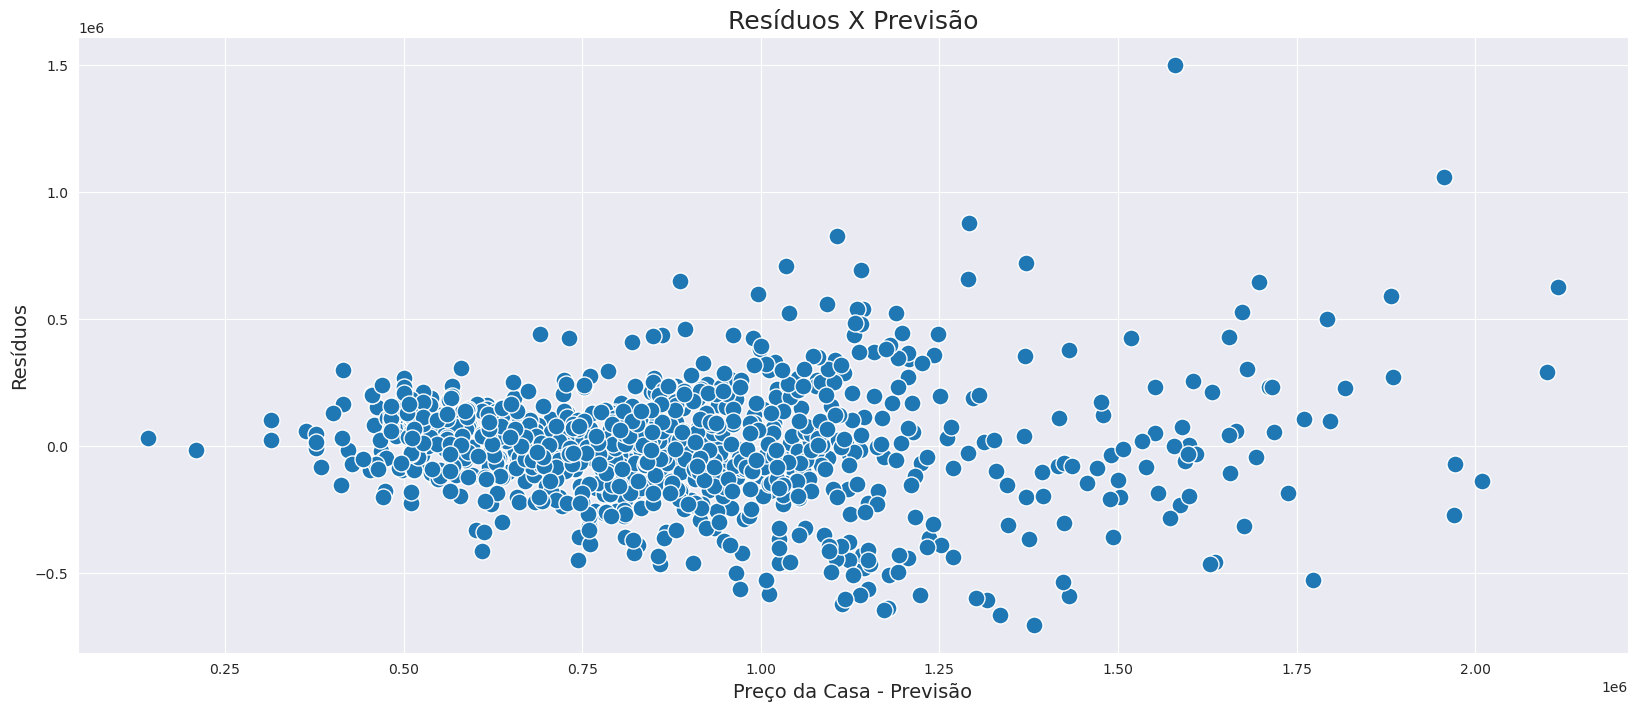

In [76]:
ax = sns.scatterplot(x= y_previsto_train, y= residuos, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Preço da Casa - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

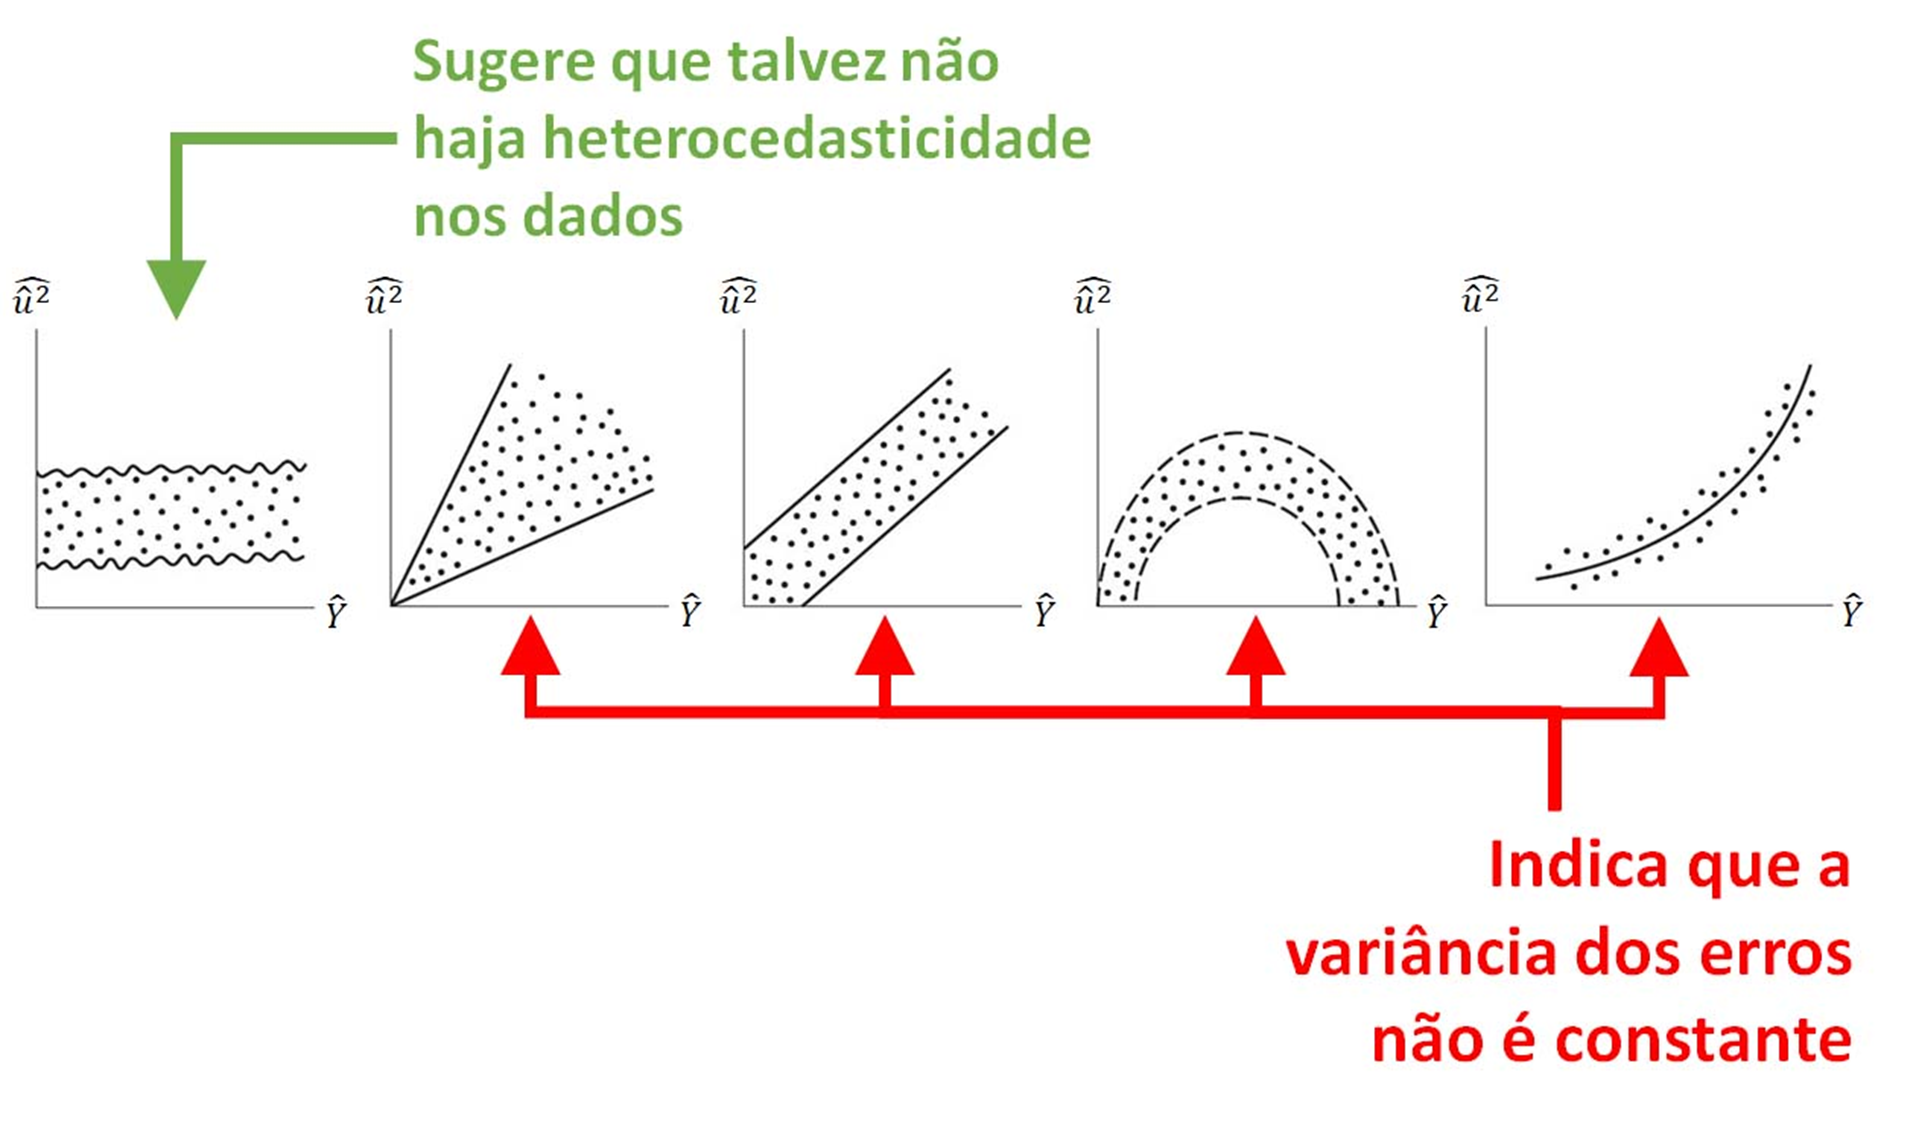

Quando mergulhamos no universo da análise de dados, um conceito fundamental que frequentemente encontramos é a regressão linear. Essa técnica nos permite entender relações e prever tendências baseando-se em dados existentes. Contudo, ao aplicar a regressão linear, é crucial estar atento à heterocedasticidade, uma característica que pode afetar significativamente a interpretação dos resultados.
#### O Que é Heterocedasticidade?

Heterocedasticidade é um termo utilizado em estatística para descrever uma situação em que a variância dos erros (ou resíduos) de um modelo de regressão, não é constante ao longo do intervalo de valores previstos. Em termos simples, se a dispersão dos resíduos varia em diferentes níveis do preditor, estamos diante da heterocedasticidade. Isso é um problema porque a maioria dos métodos de regressão linear pressupõe homocedasticidade, ou seja, que os resíduos têm variância constante em todos os níveis dos preditores.
#### Por que a Heterocedasticidade é um Problema?

A presença de heterocedasticidade pode levar a estimativas de coeficientes ineficientes e a testes de hipóteses inválidos, comprometendo a confiabilidade das inferências estatísticas. Embora não afete a imparcialidade ou a consistência dos estimadores de mínimos quadrados ordinários, ela impacta na eficiência desses estimadores, tornando-os menos confiáveis.
#### Identificando Heterocedasticidade

Um dos métodos mais comuns para detectar a heterocedasticidade é através da análise visual dos resíduos. Após ajustar um modelo de regressão linear, podemos plotar os resíduos em função dos valores previstos. Se os resíduos se espalharem de maneira uniforme, sem formar padrões ou funis, o modelo provavelmente apresenta homocedasticidade. Por outro lado, se a dispersão dos resíduos aumentar ou diminuir com os valores previstos, isso indica heterocedasticidade.
#### Como Avaliar a Heterocedasticidade?

Além de uma análise visual dos resíduos, existem vários testes estatísticos para avaliar formalmente a presença de heterocedasticidade, como o teste de White e o teste de Breusch-Pagan. Estes testes ajudam a quantificar se a variância dos resíduos está relacionada com os valores previstos, fornecendo uma base mais sólida para decidir se a heterocedasticidade é uma preocupação significativa no modelo.
#### Tratando a Heterocedasticidade

Se identificarmos heterocedasticidade, várias abordagens podem ser adotadas para lidar com o problema, como transformação de variáveis (por exemplo, logarítmica ou raiz quadrada) ou o uso de técnicas de regressão robustas, que são menos sensíveis à variância dos resíduos.
#### Conclusão

Ao compreender e identificar a heterocedasticidade, podemos tomar medidas apropriadas para garantir que nossas análises de regressão linear sejam confiáveis e válidas. Esse cuidado nos permite fazer inferências mais precisas e fundamentadas, essenciais para a tomada de decisões baseadas em dados.

### [material de apoio](https://www.esalq.usp.br/biblioteca/sites/default/files/Analise_Regress%C3%A3o.pdf)

### Aprendi até aqui

    Compreender o conceito de multicolinearidade e como ela pode afetar a interpretação dos coeficientes em um modelo de regressão linear;
    Utilizar o Fator de Inflação da Variância (VIF) para quantificar e identificar problemas de multicolinearidade entre variáveis explicativas;
    Criar e interpretar gráficos de dispersão comparando valores previstos pelo modelo com os valores reais, identificando limitações do modelo;
    Analisar os resíduos do modelo para verificar a presença de homocedasticidade, ou seja, se a variância dos resíduos é constante;
    Analisar as limitações do modelo, especialmente na precificação de imóveis mais caros, e discutimos a importância de explorar novas variáveis explicativas.